<a href="https://colab.research.google.com/github/Edina8/AEV/blob/main/Projekt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install flask dash plotly pandas

In [ ]:
pip install dash-bootstrap-components

In [62]:
from flask import Flask, render_template
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Flask app
app = Flask("Csokoládé_eladások")


In [65]:
# Dash app integrálása Flask-be
dash_app = dash.Dash("Csokoládé eladások", server=app, url_base_pathname='/dashboard/')

In [112]:
# Adatok beimportálása
data = pd.read_csv('Chocolate Sales.csv')

In [113]:
# Az adatok megtekintése
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [68]:
# Hiányzó értékek keresése
print(data.isnull().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


In [114]:
# Dátum oszlop konvertálása
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

In [115]:
# Ellenőrzés, hogy sikerült-e
print(data['Date'].head())

0   2022-01-04
1   2022-08-01
2   2022-07-07
3   2022-04-27
4   2022-02-24
Name: Date, dtype: datetime64[ns]


In [94]:
print(data['Country'].value_counts())

Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64


In [95]:
print(data['Product'].value_counts())

Product
Eclairs                 60
50% Dark Bites          60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco           56
Spicy Special Slims     54
Organic Choco Syrup     52
85% Dark Bars           50
Fruit & Nut Bars        50
After Nines             50
Peanut Butter Cubes     49
99% Dark & Pure         49
Milk Bars               49
Raspberry Choco         48
Almond Choco            48
Orange Choco            47
Mint Chip Choco         45
Manuka Honey Choco      45
Caramel Stuffed Bars    43
70% Dark Bites          42
Baker's Choco Chips     41
Choco Coated Almonds    39
Name: count, dtype: int64


In [110]:
import re

In [116]:
data['Amount'] = data['Amount'].astype(str).apply(lambda x: re.sub(r'[^\d.]', '', x))

In [117]:
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

In [118]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184


1.Ábra

In [ ]:
# Összegzés országonként
grouped = data.groupby('Country', as_index=False).agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
})

In [ ]:
# Térképes vizualizáció
fig = px.scatter_geo(
    grouped,
    locations='Country',
    locationmode='country names',
    size='Boxes Shipped',
    size_max=30,
    color='Amount',
    hover_name='Country',  # csak az ország neve legyen kiemelve
    hover_data={'Country': False, 'Amount': False, 'Boxes Shipped': True},  # mit jelenítsen meg
    projection='natural earth',
    title='Csokoládé eladások országonként'
)

fig.update_layout(geo=dict(showland=True, landcolor='lightgrey'))

fig.show()

2. Ábra

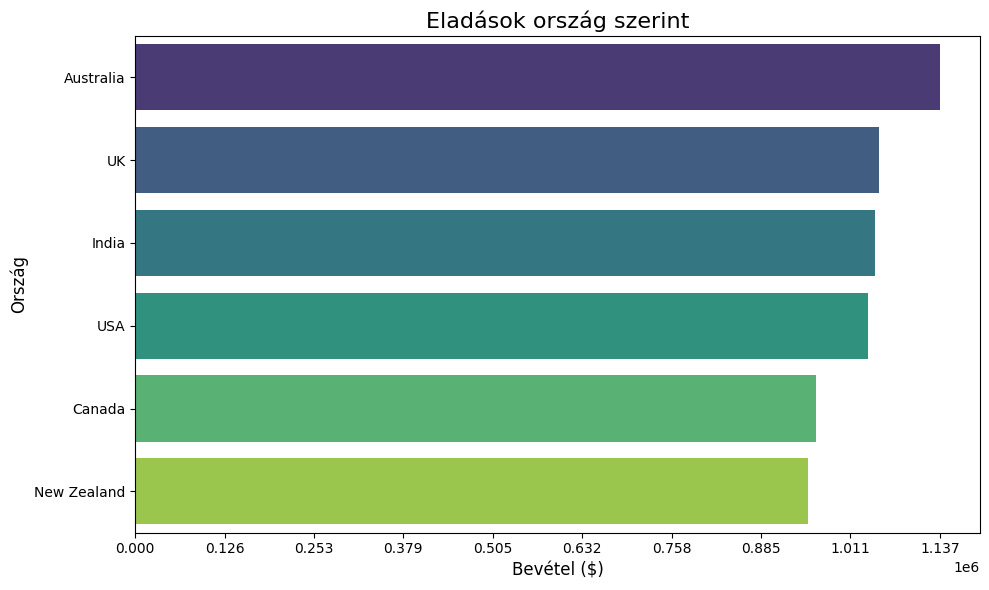

In [122]:
country_sales['Amount'] = pd.to_numeric(country_sales['Amount'], errors='coerce')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Eladások ország szerint
country_sales = data.groupby('Country')['Amount'].sum().reset_index()

# Sorbarendezés
country_sales = country_sales.sort_values(by='Amount', ascending=False)

# Ábra
plt.figure(figsize=(10, 6))
sns.barplot(data=country_sales, x='Amount', y='Country', palette='viridis')

# X tengely beosztásainak korlátozása
max_amount = country_sales['Amount'].max()
plt.xticks(np.linspace(0, max_amount, num=10))  # 6 érték

# Feliratok
plt.title('Eladások ország szerint', fontsize=16)
plt.xlabel('Bevétel ($)', fontsize=12)
plt.ylabel('Ország', fontsize=12)

plt.tight_layout()
plt.show()

3. Ábra

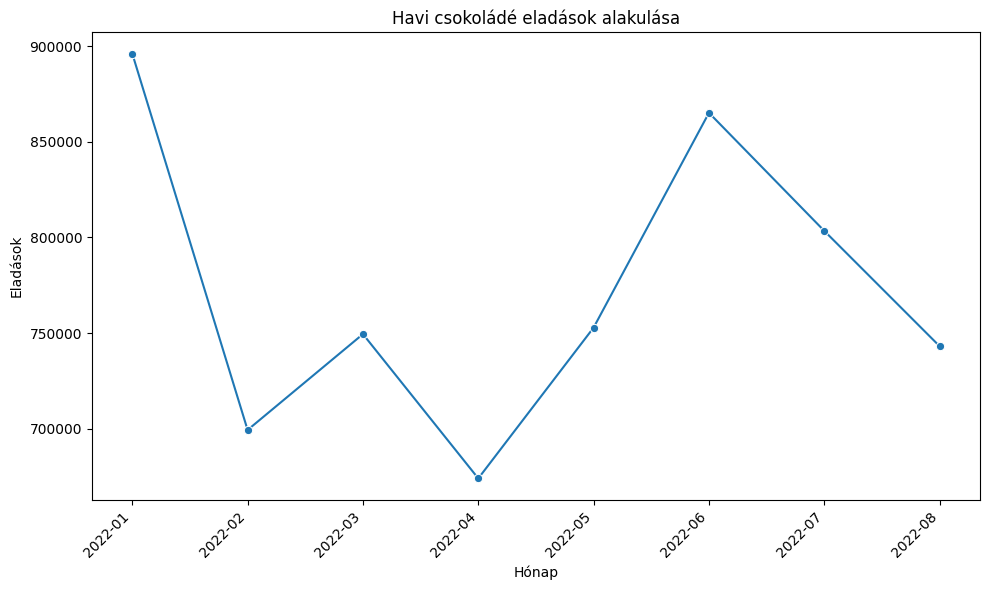

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Extract month from 'Date' column
data['Month'] = pd.to_datetime(data['Date']).dt.to_period('M')

# 2. Group by month and sum sales
monthly_sales = data.groupby('Month')['Amount'].sum().reset_index()

# 3. Convert 'Month' to string
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# 4. Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', marker='o')
plt.title('Havi csokoládé eladások alakulása')
plt.xlabel('Hónap')
plt.ylabel('Eladások')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#a teljes értékesítési volumen és tendencia megértése

4. Ábra

In [126]:
import plotly.express as px
import pandas as pd


# 1. Extract month from 'Date' column if needed
data['Month'] = pd.to_datetime(data['Date']).dt.to_period('M').astype(str)

# 2. Group by month and country, and sum sales
monthly_country_sales = data.groupby(['Month', 'Country'])['Amount'].sum().reset_index()

# 3. Create the 3D scatter plot
fig = px.scatter_3d(monthly_country_sales,
                    x='Month',
                    y='Country',
                    z='Amount',
                    color='Amount',  # Color points based on sales amount
                    title='Havi csokoládé eladások (Ország, Hónap, Eladások)')

fig.update_layout(scene=dict(xaxis_title='Hónap',
                             yaxis_title='Ország',
                             zaxis_title='Eladások'))

fig.show()

5.Ábra

In [127]:
# Csokoládé eladások típusonkénti eloszlása
type_sales = px.histogram(data_frame=data,
                           x="Product",
                           y="Boxes Shipped",
                           title="Csokoládé eladások típusonkénti eloszlása")
type_sales.update_xaxes(title_text="Típus")
type_sales.update_yaxes(title_text="Eladások")

6. Ábra

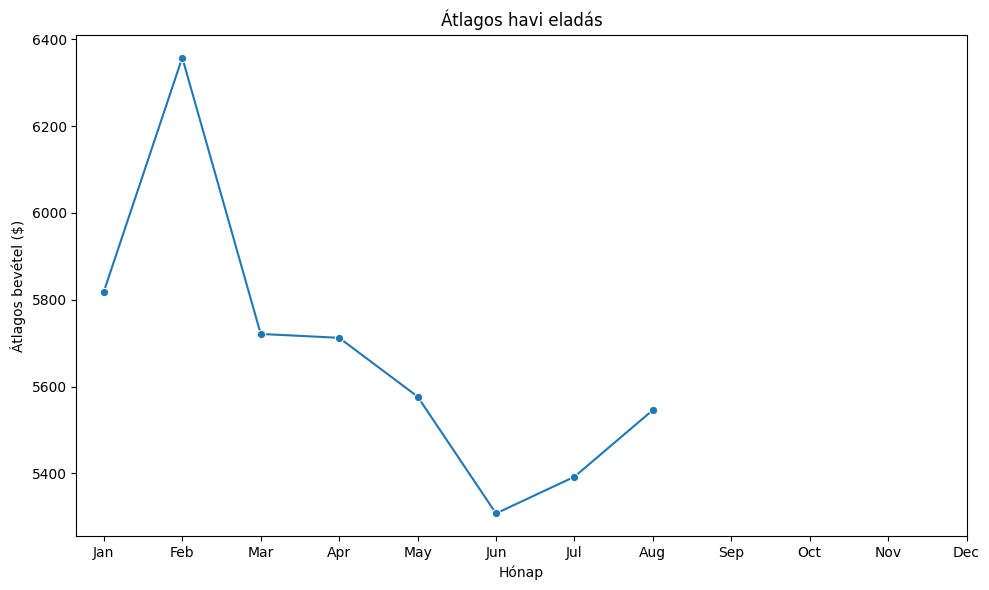

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Extract month from 'Date' column
data['Month_Num'] = pd.to_datetime(data['Date']).dt.month

# 2. Group by month and calculate average sales
monthly_avg = data.groupby('Month_Num')['Amount'].mean().reset_index()

# 3. Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month_Num', y='Amount', marker='o')
plt.title('Átlagos havi eladás')
plt.xlabel('Hónap')
plt.ylabel('Átlagos bevétel ($)')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
#a szezonális mintákat és az átlagos értékesítési viselkedést szeretné azonosítani

7. Ábra

In [129]:
# A 10 legjobban eladott csokoládé márka
top_brands = data.groupby('Product')['Boxes Shipped'].sum().nlargest(10)
top_brands_chart = px.bar(top_brands,
                          x=top_brands.index,
                          y=top_brands.values,
                          title="Top 10 legjobban eladott csokoládé márka")
top_brands_chart.update_xaxes(title_text="Márka")
top_brands_chart.update_yaxes(title_text="Eladások")

8.Ábra

In [130]:
import plotly.express as px
import pandas as pd

# 1. Group by country and product, then get the top product for each country
top_products_country = data.groupby(['Country', 'Product'])['Amount'].sum().reset_index()
idx = top_products_country.groupby('Country')['Amount'].idxmax()
top_product_by_country = top_products_country.loc[idx]

# 2. Create the choropleth map
fig = px.choropleth_mapbox(top_product_by_country,
                           geojson="https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json",
                           locations='Country',
                           featureidkey="properties.name",
                           color='Amount',
                           hover_name='Product',  # Show product name on hover
                           color_continuous_scale="Viridis",
                           range_color=(0, top_product_by_country['Amount'].max()),
                           mapbox_style="carto-positron",
                           zoom=1,
                           center={"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'Amount': 'Bevétel ($)'},
                           title='Legjobban fogyó csokoládé termék országonként')

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

9.Ábra

In [131]:
import plotly.express as px
import pandas as pd

# Create interactive scatter plot with filters
fig = px.scatter(data_frame=data,
                 x='Amount',
                 y='Boxes Shipped',
                 color='Country',
                 size='Boxes Shipped',
                 hover_name='Product',
                 title="Csokoládé Eladások Interaktív Ábrája",
                 custom_data=['Product'])

# Add dropdown filters for 'Country' and 'Product'
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            active=0,
            x=0.1,
            y=1.1,
            buttons=list([
                dict(label="Összes Ország",
                     method="update",
                     args=[{"visible": [True for _ in fig.data]},
                           {"title": "Összes Ország"}]),
                *[dict(label=country,
                          method="update",
                          args=[{"visible": [(d.name == country) for d in fig.data]},
                                {"title": f"Ország: {country}"}]
                         ) for country in data['Country'].unique()]
            ]),
        ),
    ]
)

fig.show()